# **Classificação Fumante: Tunagem de Hiperparâmetros**

Como foi visto nos anteriores caso (**KNN**, **RLinear** ou **Árvore de Decisãao**) o fato de ser ou não fumante afeta muito o valor dos custos médicos quando falamos de seguro de saúde, portanto é possível de que a passoa omita o fato de ser fumante ou não. Esta omissão pode ser considerada como fraude e traz um grande perjuizo nas empresas que brindam estes planos.  

Em principio não teríamos a necesidade de prever a variável fumante (definida por Sim =1  e Não = 0). Assume-se que esta é uma variável cadastral, mas por se uma variável muito importante no cálculo dos custos médicos do plano de saúde é muito importante examinar a veracidade das informações dos dados cadastrais. Isto é, a idea não é predecir se a pessoa é fumante ou não, a ideia fundamental é verificar as informações fornecidas (ser fumante) para evitar perjuizo.

Com base nesta necessidade, a ideia neste problema é determinar se um novo elemento corresponde ou não a alguma das categorias (0, 1) de uma determinada variável (Fumante).

Para nosso caso ilustrativo vamos determinar (classificar) se elementos correspondem a uma determinada característica (variável fumante) usando como informação os dados de custos médicos. 

---
## **Importação e Preparação dos Dados**

Os dados podem ser obtido do site do Kaggle.com : https://www.kaggle.com/datasets/mirichoi0218/insurance

Podemos fazer um download e depois abrir ou também importar diretamente usando um link onde esta o arquivo. Esses dados serão guardados na variável **dados** do tipo _dataframe_.

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/profjuanito/Dataset/main/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# mise un place completo - pré-processamento dos dados

dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/max(dados['charges']) 
dados['age'] = dados['age']/max(dados['age'])   
dados['bmi'] = dados['bmi']/max(dados['bmi'])   
dados = pd.get_dummies(dados, columns = ['sex', 'children', 'region'], drop_first = True)
dados.head()

,age,bmi,smoker,charges,sex_male,children_1,children_2,children_3,children_4,children_5,region_northwest,region_southeast,region_southwest
0,0.296875,0.525127,1,0.264777,0,0,0,0,0,0,0,0,1
1,0.281250,0.635611,0,0.027059,1,1,0,0,0,0,0,1,0
2,0.437500,0.621118,0,0.069773,1,0,0,1,0,0,0,1,0
3,0.515625,0.427348,0,0.344744,1,0,0,0,0,0,1,0,0
4,0.500000,0.543572,0,0.060637,1,0,0,0,0,0,1,0,0


In [ ]:
# separação de variáveis preditoras e variával resposta 
X = dados.drop('smoker', axis = 1)
y = dados['smoker']

## **Tunagem de Hiperparâmetros** 

Tunagem de Hiperparâmetros nada mais é do que encontrar qual a melhor combinação de valores que passamos aos algoritmos no momento de seu treinamento. Algums modelos tem poucos hiperparâmetros que se deseja tunar, outros têm muitos. 

Para fazer essa checagem, testa-se através de um método de validação selecionado, o desempenho de cada possível combinação de hiperparâmetros apresentado. Logo se vê que se necessita de bastante poder computacional para realizar tal checagem. 

Na função abaixo, temos um programa que realiza a busca pelos hiperparâmetros. Veja que ela utiliza dois tipos de hipertunagem de parâmetros, o tipo = 'tudo', que testa todo espaço de parâmetros apresentado (custoso, lento, preciso), e o tipo = 'aleatorio', que testa apenas uma amostra aleatória do espaço de parâmetros (menos custoso, rápido, menos preciso). 

Nesse exemplo, estamos procurando qual é o melhor K para o KNN. Varremos todas as possibilidades de 1 até 49, de 2 em 2, o que totaliza 25 modelos diferentes para se testar. E em cada modelo, é aplicada a estratégia de validação corresponde, muitas vezes envolvendo várias iterações do K-Fold.

Devemos escolher entre as duas estratégias levando em consideração o recurso computacional que temos em mão e o tempo que podemos dispor para encontrar a solução. 

In [ ]:
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

A funções novas para fazer a seleção temos: 

_GridSearchCV_: que precisa dos seguintes parâmetros (para KNN):

scoring: tipo de métrica para ter o melhor modelo.

verbose: controla o nivel de print a ser mostrados

_n_jobs_: -1 indica que use processamento paralelo (use todos os core)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
np.arange(1, 50, 2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

In [ ]:
modelo = KNeighborsClassifier()
parametros = { 'n_neighbors' : np.arange(1, 50, 2) }
grid_search = GridSearchCV(modelo, param_grid = parametros,
                                   scoring = 'accuracy', 
                                   cv = validacao, 
                                   verbose = 1,
                                   n_jobs = -1)
grid_search.fit(X, y)

Fitting 30 folds for each of 25 candidates, totalling 750 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.931990423820746

In [ ]:
grid_search.cv_results_['mean_test_score']

array([0.93199042, 0.90632177, 0.89710844, 0.8841488 , 0.87394793,
       0.86996409, 0.86474208, 0.85626379, 0.84954364, 0.84380915,
       0.83408895, 0.82761381, 0.82361875, 0.81763364, 0.8133973 ,
       0.81165788, 0.81141099, 0.80991471, 0.81016908, 0.80817716,
       0.80743089, 0.80768526, 0.80644148, 0.80668649, 0.80768713])

In [ ]:
grid_search.best_params_

{'n_neighbors': 1}

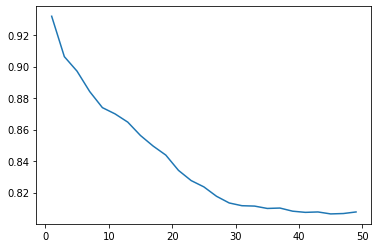

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1, 50, 2), grid_search.cv_results_['mean_test_score']);

In [ ]:
grid_search.best_params_

_RandomizedSearchCV_: que precisa de um parâmetro adicional

n_iter: número de iterações

In [ ]:
random_search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                   scoring = 'accuracy', 
                                   cv = validacao, 
                                   verbose = 1,
                                   n_iter = 10,
                                   n_jobs = -1)

random_search.fit(X, y)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
                   estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
                   scoring='accuracy', verbose=1)

In [ ]:
random_search.cv_results_['mean_test_score']

array([0.84081659, 0.82488123, 0.84505667, 0.81316351, 0.87145476,
       0.80868589, 0.85302809, 0.89562152, 0.8074365 , 0.86149516])

In [ ]:
random_search.best_score_

0.8956215164777616

In [ ]:
random_search.best_params_

{'n_neighbors': 5}

---

Vamos criar uma função para visualizar melhor os resultados



In [ ]:
def Tunagem(modelo, treino, targets, parametros, tipo = 'grid', metrica = 'accuracy', n_iter = 20):
 
    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

    if tipo == 'grid':
        search = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = metrica, cv = validacao, 
                                  verbose = 1, n_jobs = -1)
    elif tipo == 'random':
        search = RandomizedSearchCV(modelo, param_distributions = parametros,
                                scoring = metrica, cv = validacao,
                                n_iter = n_iter, verbose = 1, n_jobs = -1)
    else:
        print('entrada invalida no argumento "tipo"')


    search.fit(treino, targets) 
    melhor = search.best_estimator_

    print('\nAcuracia: {:.4f}'.format(search.best_score_))
    print('Melhores parâmetros: {}\n'.format(search.best_params_))

    return melhor


In [ ]:
parametros = {  'n_neighbors' : np.arange(1, 50, 2)  }
modelo = KNeighborsClassifier()
knn = Tunagem(modelo, X, y, parametros, tipo = 'random')

Fitting 30 folds for each of 20 candidates, totalling 600 fits

Acuracia: 0.9355
Melhores parâmetros: {'n_neighbors': 1}



In [ ]:
np.arange(2,21,2)

In [ ]:
parametros = {   
              'max_depth' : np.arange(1,11), 
              'min_samples_split': np.arange(2,21,2),
              'min_samples_leaf': np.arange(1,11),
                 }

modelo = DecisionTreeClassifier()
arvore = Tunagem(modelo, X, y, parametros, tipo = 'random', n_iter = 50)
arvore

Fitting 30 folds for each of 50 candidates, totalling 1500 fits

Acuracia: 0.9631
Melhores parâmetros: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 3}



DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=10)

In [ ]:
parametros = {   
                 'n_estimators': [50, 100, 150],
                 'max_features': [2,3,4,5],
                 'bootstrap': [True, False] ,      
                 'max_depth' : [2, 4, 6, 8, 10],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 3, 5]
                 }

modelo = RandomForestClassifier()

rf = Tunagem(modelo, X, y, parametros, tipo = 'random', n_iter = 5)
rf

Fitting 30 folds for each of 5 candidates, totalling 150 fits

Acuracia: 0.9634
Melhores parâmetros: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 8, 'bootstrap': False}



RandomForestClassifier(bootstrap=False, max_depth=8, max_features=4,
                       min_samples_split=5, n_estimators=150)

## Conclusão

Para esta análise, o fato de ter utilizado todas as variáveis fez com que a acurácia caísse. Tinhamos melhor valor com menos variáveis, tanto **KNN** como **Random Forest** são sensíveis a parâmetros considerados inúteis.

É bom também fazer uma análise estatística (características das variáveis como correlação e multicolinearidade), isto é, já contamos com as ferramentas, mas usar a ferramenta sem ter conhecimento das variáveis (entender a origem e caraterísticas) podemos não ter um bom resultado. 